## Phase 1 - Exploratory data analysis (EDA) + Feature importance with Random Forest

#### BUSINESS REQUIREMENT detailed in phase 0

** The public dataset proviced by IBM will present revenue information related to some products and countries for specific years (2004 to 2007)

#### The Business question are:

- 1. Can we predict our revenue in 2008 ?
- 2. What is the confidence of this prediction ?
- 3. And finally, if we sell the same products from 2007, what are the divergence expected on revenue in 2008 ?


#### Info

- In this notebook we are going to evaluate and profile the dataset
- Run a Random Forest Regressor to plot the feature importance and evaluate one initial prediction

In [1]:
import pandas as pd
import pandas_profiling as pp

### Dataset
the dataset used in this process can be accessed trought IBM website below

https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/
    

In [2]:
df = pd.read_csv('../data/WA_Retail-SalesMarketing_-ProfitCost.csv')

## fill NaN com zero

df.fillna(0, inplace=True)

## Predict Revenue - columns used
df = df [['Year' ,'Product line' ,'Product type' ,'Product' ,'Order method type' ,'Retailer country' ,'Revenue' ,'Planned revenue']]

df.head().T

,0,1,2,3,4
Year,2004,2004,2004,2004,2004
Product line,Camping Equipment,Camping Equipment,Camping Equipment,Camping Equipment,Camping Equipment
Product type,Cooking Gear,Cooking Gear,Cooking Gear,Cooking Gear,Cooking Gear
Product,TrailChef Water Bag,TrailChef Water Bag,TrailChef Water Bag,TrailChef Water Bag,TrailChef Water Bag
Order method type,Telephone,Telephone,Telephone,Telephone,Telephone
Retailer country,United States,Canada,Mexico,Brazil,Japan
Revenue,315044,13444.7,0,0,181120
Planned revenue,437477,14313.5,0,0,235237


### Profile the data

In [3]:
# pp.ProfileReport(df, check_correlation=False)

pp.ProfileReport(df, check_correlation=True)


Number of variables,8
Number of observations,84672
Total Missing (%),0.0%
Total size in memory,5.2 MiB
Average record size in memory,64.0 B
Numeric,2
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,1


### Exclude column with high correlation

- Planned Revenue

In [4]:
## drop items not used
drop_items = ['Planned revenue']

df.drop(drop_items, axis = 1, inplace = True)

### Machine Learning model - Random Forest Regressor

- More info at sklearn website

    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [5]:
## sklearn import 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 

# LabelEncoder
le = LabelEncoder()

# apply "le.fit_transform"
df = df.apply(le.fit_transform)


In [6]:
target = 'Revenue'
features = df.columns.tolist()
features.remove(target)

X = df[features]
y = df[target]

In [7]:
# Generate train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=122345)


## This line instantiates the model. 
fit_rf = RandomForestRegressor() 

## Fit the model on your training data.
fit_rf.fit(X_train, y_train) 

## And score it on your testing data.
fit_rf.score(X_test, y_test)


print('----------------------- The best score/coefficient of determination R^2 of the prediction is: ' + str(fit_rf.score(X_test, y_test)))
fit_rf.score(X_test, y_test)

----------------------- The best score/coefficient of determination R^2 of the prediction is: 0.8442048767542322


0.8442048767542322

### Plot Feature Importance

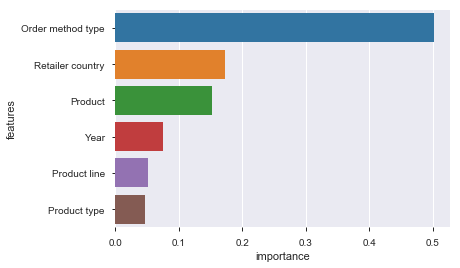

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
feature_importances = pd.DataFrame({'features': X_train.columns, 
                            'importance': fit_rf.feature_importances_}).sort_values('importance', ascending=False)

ax = sns.barplot(x="importance", y="features", data=feature_importances)

## Summary - initial analysis

#### The 3 most important features that drives revenue are

- 1. Order method type
- 2. Retailer country and
- 3. Product

